**Sharks Attacks**

data link:

https://www.kaggle.com/datasets/thedevastator/shark-attacks-the-risks-of-coastal-water-activit



In [69]:
from pandas.core.window.online import import_optional_dependency
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date , datetime
import statistics as st

**Read Data**

In [70]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GSAF5.xls.csv/GSAF5.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
print(df.columns)

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=257)


In [72]:
df=df.rename(columns={'Fatal (Y/N)':'Fatal','Species ':'Species'})

In [73]:
df = df[['Date','Year','Type','Country','Area','Location','Activity','Name','Age','Injury','Fatal','Time','Species','Investigator or Source','pdf','href formula','Case Number.1','Case Number.2','original order']]

df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,Case Number.1,Case Number.2,original order
0,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN
1,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,N,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN
2,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0
3,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0
4,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,Lacerations to foot,N,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0


**Data Cleaning**

In [74]:
df.isna().sum()

Date                         1
Year                         3
Type                         5
Country                     51
Area                       463
Location                   545
Activity                   552
Name                       215
Age                       2871
Injury                      29
Fatal                      547
Time                      3392
Species                   2924
Investigator or Source      19
pdf                       3396
href formula              3400
Case Number.1             3400
Case Number.2             3400
original order            3400
dtype: int64

In [75]:
columns = df.columns
for col in columns:
  if (df[col].isna().sum()/df.shape[0]*100>50):
    df.drop(col , axis=1,inplace=True)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6461 non-null   object 
 1   Year                    6459 non-null   float64
 2   Type                    6457 non-null   object 
 3   Country                 6411 non-null   object 
 4   Area                    5999 non-null   object 
 5   Location                5917 non-null   object 
 6   Activity                5910 non-null   object 
 7   Name                    6247 non-null   object 
 8   Age                     3591 non-null   object 
 9   Injury                  6433 non-null   object 
 10  Fatal                   5915 non-null   object 
 11  Species                 3538 non-null   object 
 12  Investigator or Source  6443 non-null   object 
dtypes: float64(1), object(12)
memory usage: 656.4+ KB


In [77]:
df['Year'] = df['Year'].fillna(0)
df['Year']=df['Year'].astype('int')

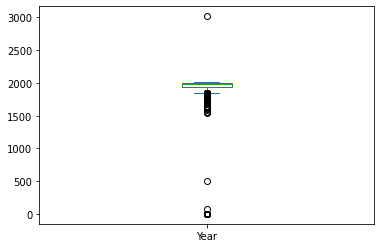

In [78]:
df['Year'].plot(kind='box')
plt.show()

In [79]:
df['Year'].sort_values().unique()

array([   0,    5,   77,  500, 1543, 1554, 1555, 1580, 1595, 1617, 1637,
       1638, 1642, 1700, 1703, 1721, 1723, 1733, 1738, 1742, 1748, 1749,
       1751, 1753, 1755, 1758, 1764, 1767, 1771, 1776, 1779, 1780, 1783,
       1784, 1785, 1786, 1787, 1788, 1791, 1792, 1797, 1800, 1801, 1802,
       1803, 1804, 1805, 1807, 1808, 1810, 1811, 1812, 1815, 1816, 1817,
       1818, 1819, 1822, 1823, 1825, 1826, 1827, 1828, 1829, 1830, 1831,
       1832, 1834, 1835, 1836, 1837, 1839, 1840, 1841, 1842, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1855, 1856, 1857,
       1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868,
       1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879,
       1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 19

In [80]:
df=df[(df['Year']>=1543) &(df['Year']<3019)]


In [81]:
df['Date']

0                    05-Feb-2020
1           Reported 30-Jan-2020
2                    17-Jan-2020
3                    16-Jan-2020
4                    13-Jan-2020
                  ...           
6329                        1595
6330    Letter dated 10-Jan-1580
6331                        1555
6332                    Ca. 1554
6333                    Ca. 1543
Name: Date, Length: 6330, dtype: object

In [82]:
df['Date'] = df['Date'].str.strip('Reported ')
df['Date'] = df['Date'].str.strip('Before ') 
df['Date'] = df['Date'].str.strip('Letter dated ') 
df['Date']=pd.to_datetime(df['Date'],errors='coerce',infer_datetime_format=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [83]:
df['Date'].isna().sum()

827

In [84]:
df['Date'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [85]:
for i,x in enumerate(df['Date']) :
   if x==0 :
      df.loc[i,'Date']  =  datetime(df.loc[i,'Year'],1,1 ,00,00,00 )
      
df['Date']=pd.to_datetime(df['Date'],errors='coerce',infer_datetime_format=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [86]:
df['Age'].unique()

array([nan, '24', '59', '13', '26', '75', '7', '57', '12', '21', '30s',
       '45', '33', '17', '37', '70', '9', '30', '38', '23', '44',
       '28 & 22', '32', '35', '20', '29', '22, 57, 31', '22', '60s', '40',
       '11', '16', '51', '18', '49', "20's", '40s', '8', '64', '19', '43',
       '65', '10', '67', '53', '28', '25', '58', '46', '41', '31', '50',
       '15', '9 & 60', '48', '36', '42', '55', 'a minor', '14', '6', '62',
       '52', '34', '60', '54', '56', '69', '20s', '3', '82', '73', '68',
       '39', 'Teen', '47', '61', '66', '72', '27', '71', '63',
       '18 months', '50s', 'teen', '77', '74', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '8 or 10', '84', '30 or 36', '6½', '21 & ?', '33 or 37',
       'mid-30s', '23 & 20', '7 & 31', '20?', "60's", '32 & 30',
       '16 to 18', '87', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35'

In [87]:
age = []
for i in range(1,101):
  age.append(str(i))

err = set(df['Age']).difference(age) 
err=df['Age'].isin(err) 

ages = df.loc[~err,'Age']

ages=ages.astype('int')

mode = int(st.mode(ages))

df.loc[err,'Age'] = mode

In [88]:
df['Age']=df['Age'].astype('int')
df['Fatal']=df['Fatal'].str.replace('N','')

df['Fatal']=df['Fatal'].astype('bool')

df = df.fillna('unknown')

df['Species']=df['Species'].astype('category')
df['Type']=df['Type'].astype('category')
df['Activity']=df['Activity'].astype('category')

df['Date']=pd.to_datetime(df['Date'],errors='coerce',infer_datetime_format=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6330 entries, 0 to 6333
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    5737 non-null   datetime64[ns]
 1   Year                    6330 non-null   int64         
 2   Type                    6330 non-null   category      
 3   Country                 6330 non-null   object        
 4   Area                    6330 non-null   object        
 5   Location                6330 non-null   object        
 6   Activity                6330 non-null   category      
 7   Name                    6330 non-null   object        
 8   Age                     6330 non-null   int64         
 9   Injury                  6330 non-null   object        
 10  Fatal                   6330 non-null   bool          
 11  Species                 6330 non-null   category      
 12  Investigator or Source  6330 non-null   object  

In [90]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/GSAF5.xls.csv/new GSAF after creaning.csv')
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal,Species,Investigator or Source
0,2020-02-05,2020,Unprovoked,USA,Maui,unknown,Stand-Up Paddle boarding,unknown,17,"No injury, but paddleboard bitten",False,Tiger shark,"K. McMurray, TrackingSharks.com"
1,2020-01-30,2020,Provoked,BAHAMAS,Exumas,unknown,Floating,Ana Bruna Avila,24,PROVOKED INCIDENT Scratches to left wrist,False,unknown,"K. McMurray, TrackingSharks.com"
2,2020-01-17,2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,59,Laceration ot left ankle and foot,False,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T..."
3,2020-01-16,2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,13,Minor injury to lower leg,False,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com"
4,2020-01-13,2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,26,Lacerations to foot,False,unknown,"C. Creswell, GSAF"


**Exploring and Visualization Data**

Count of attack in each year

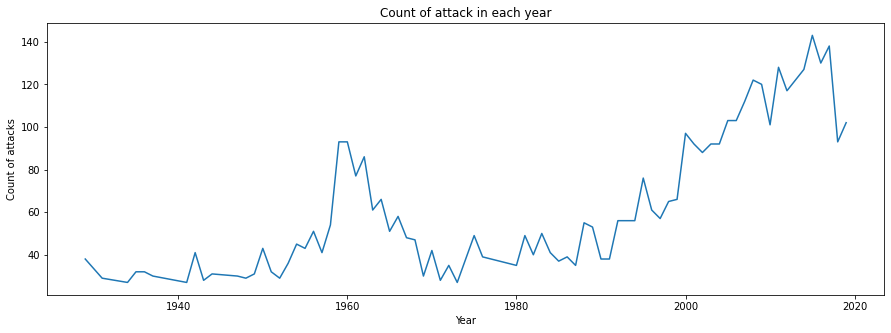

In [91]:
plt.figure(figsize=[15,5])
data1 = df['Year'].value_counts().sort_values(ascending=True)
data1 = data1.tail(80)
sns.lineplot(x=data1.index , y=data1,data =data1)
plt.title('Count of attack in each year')
plt.xlabel('Year')
plt.ylabel('Count of attacks')
plt.show()

**Count of attack in each month in 2019**

Text(0, 0.5, 'Count of attacks')

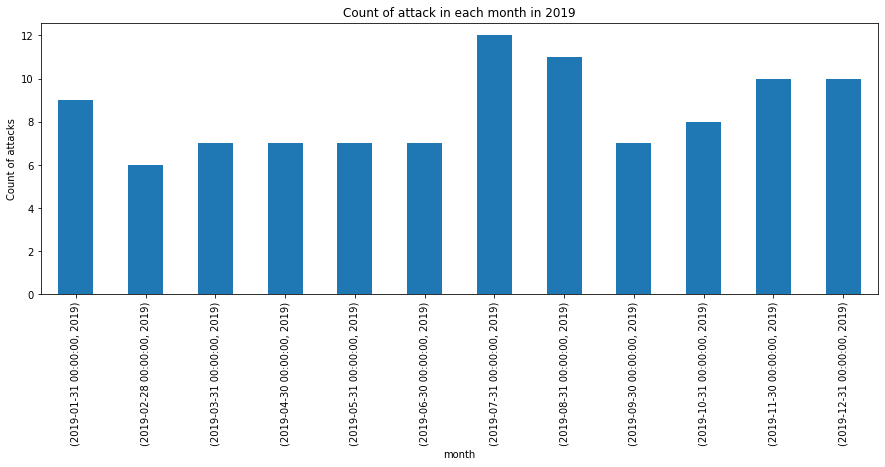

In [92]:
plt.figure(figsize=[15,5])
df2 = df.dropna()
df2.set_index(df2['Date']).resample('M')['Year'].value_counts()[-14:-2].plot(kind='bar')
plt.title('Count of attack in each month in 2019')
plt.xlabel('month')
plt.ylabel('Count of attacks')

**The type of shark attack Counts**

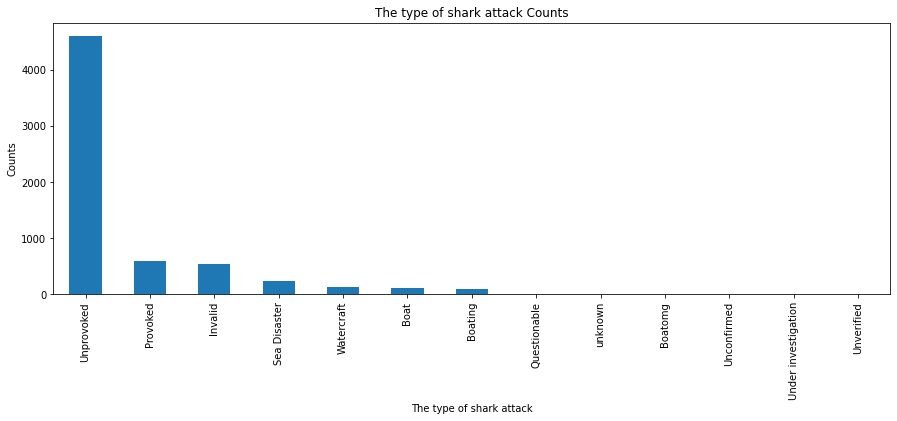

In [93]:
plt.figure(figsize=[15,5])
data2 = df['Type'].value_counts().sort_values(ascending=False).plot(kind='bar')

plt.title('The type of shark attack Counts')
plt.xlabel('The type of shark attack')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

**5 High Countries in attack**

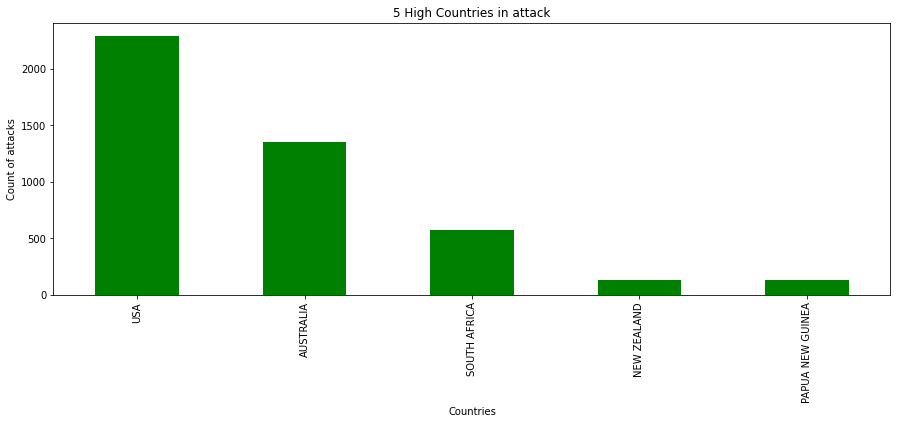

In [94]:
plt.figure(figsize=[15,5])
data3 = df['Country'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color ='green' )

plt.title('5 High Countries in attack')
plt.xlabel('Countries')
plt.ylabel('Count of attacks')
plt.xticks(rotation = 90)
plt.show()

**most 5 Sharks attack**

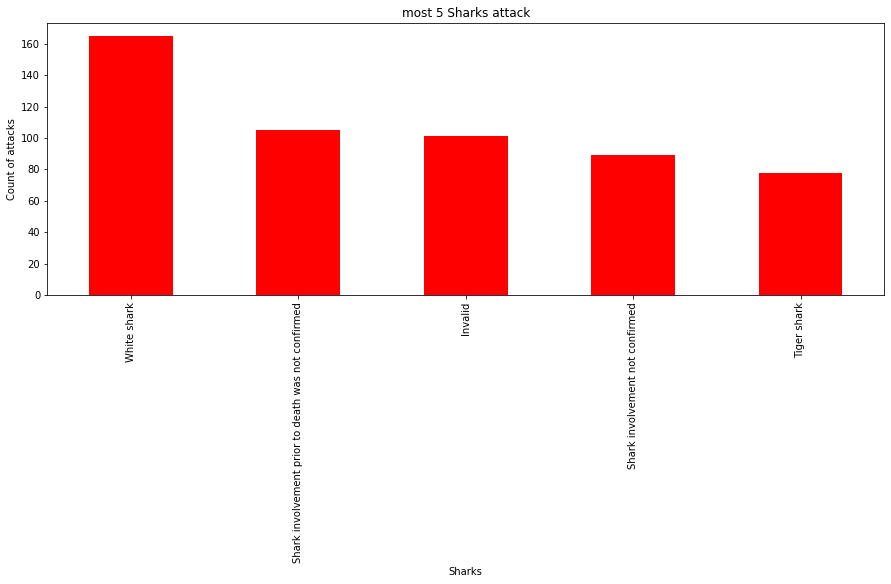

In [95]:
plt.figure(figsize=[15,5])
data4 = df['Species'].value_counts().sort_values(ascending=False)[1:6].plot(kind='bar',color ='red' )

plt.title('most 5 Sharks attack')
plt.xlabel('Sharks')
plt.ylabel('Count of attacks')
plt.xticks(rotation = 90)
plt.show()

**Fatal**

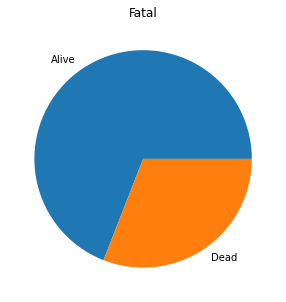

In [96]:
plt.figure(figsize=[15,5])
data5 = df['Fatal'].value_counts()
plt.pie(data5,labels=['Alive','Dead'])
plt.title('Fatal')
plt.xticks(rotation = 90)
plt.show()

Most victim Ages died because of sharks attack

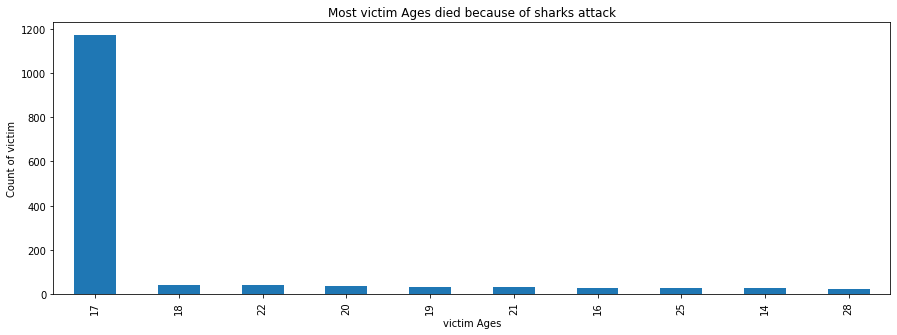

In [97]:
plt.figure(figsize=[15,5])
data6 = df.loc[df['Fatal']==True ,'Age' ].value_counts()[:10].plot(kind='bar')
plt.title('Most victim Ages died because of sharks attack')
plt.xlabel('victim Ages')
plt.ylabel('Count of victim')

plt.show()

**number of died in year**

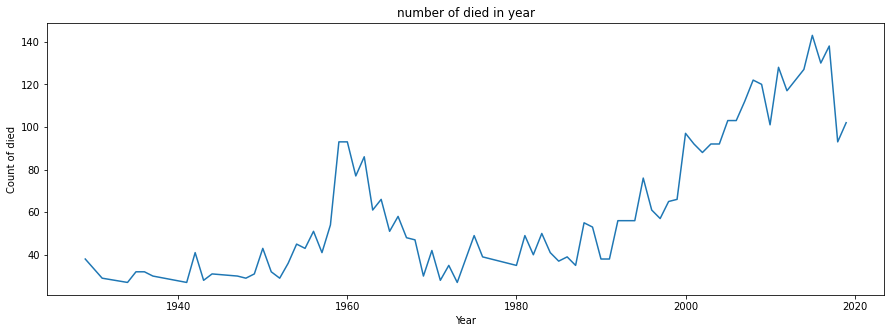

In [98]:
plt.figure(figsize=[15,5])
data7 = df.loc[df['Fatal']==True ,'Year' ].value_counts()
sns.lineplot(x=data1.index , y=data1,data =data1)
plt.title('number of died in year')
plt.xlabel('Year')
plt.ylabel('Count of died')
plt.show()

**Dangerious kiler Sharks**

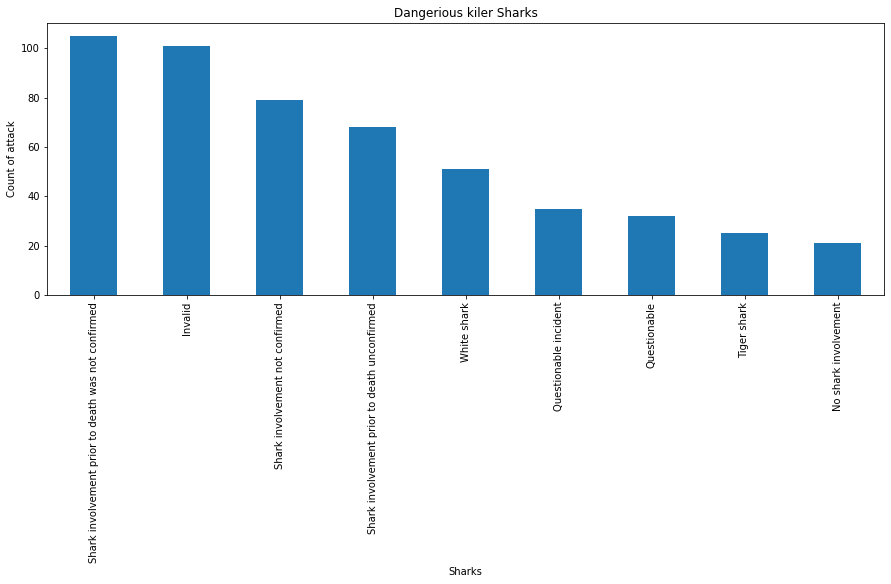

In [99]:
plt.figure(figsize=[15,5])
data8 = df.loc[df['Fatal']==True ,'Species' ].value_counts()[1:10].plot(kind='bar')
plt.title('Dangerious kiler Sharks')
plt.xlabel('Sharks')
plt.ylabel('Count of attack')

plt.show()

**Activity while attack**

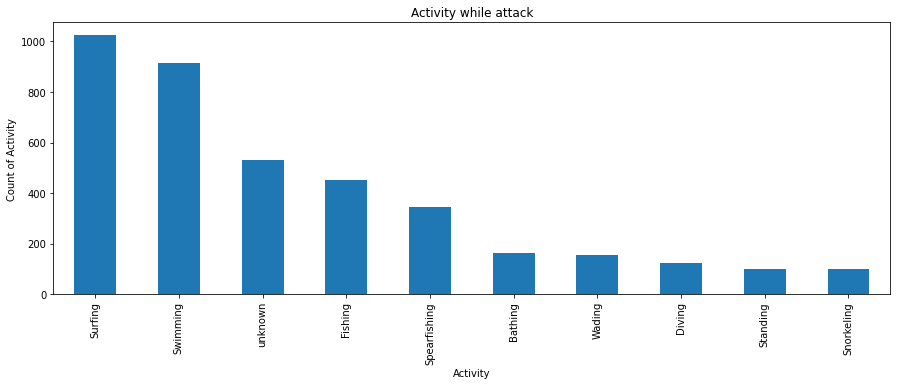

In [100]:
plt.figure(figsize=[15,5])
data9 = df['Activity' ].value_counts()[:10].plot(kind='bar')
plt.title('Activity while attack')
plt.xlabel('Activity')
plt.ylabel('Count of Activity')

plt.show()

**Activity while attack lead to died**

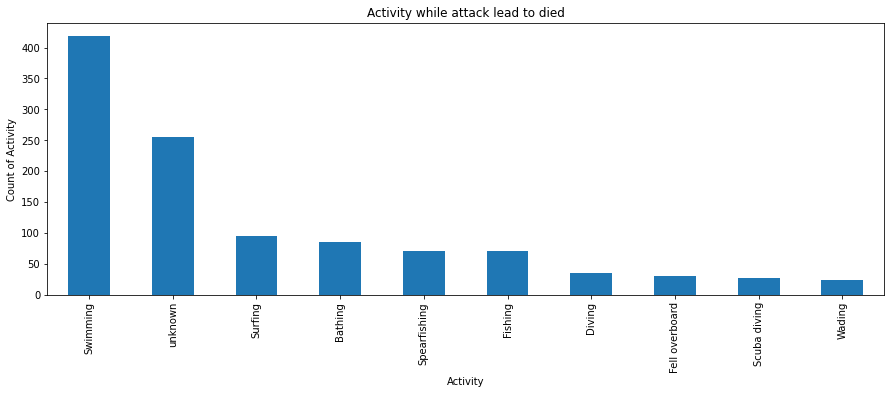

In [101]:
plt.figure(figsize=[15,5])
data10 = df.loc[df['Fatal']==True ,'Activity' ].value_counts()[:10].plot(kind='bar')
plt.title('Activity while attack lead to died')
plt.xlabel('Activity')
plt.ylabel('Count of Activity')

plt.show()

**Z-Score Proportion** 

**A person who is attacked by a shark dies**

**H0:Plive - Pdie <= 0**

**H1:Plive - Pdie > 0 ***

In [102]:
p_hats = df['Fatal'].value_counts(normalize=True)
p1=p_hats[0]
p2=p_hats[1]

p_hats

False    0.690679
True     0.309321
Name: Fatal, dtype: float64

In [103]:
n = df['Fatal'].value_counts()
n1=n[0]
n2=n[1]

n

False    4372
True     1958
Name: Fatal, dtype: int64

In [104]:
p=(p1*n1+p2*n2) /(n1+n2)

In [105]:
st=np.sqrt(p * (1-p) / n1 + p * (1-p) / n2)


In [106]:
z_score = (p1 - p2) / st

print(z_score)

28.34981974416893


In [107]:
from scipy.stats import norm
p_value = 1-(norm.cdf(z_score))

In [108]:
alpha=0.05
p_value <= alpha

True

**So   p_value <= alpha ***

**We Reject H0 ***

**this mean A person who is attacked by a shark may  be  still alive**

In [109]:
df.corr()

,Year,Age,Fatal
Year,1.000000,0.257676,-0.337292
Age,0.257676,1.000000,-0.062393
Fatal,-0.337292,-0.062393,1.000000
